In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy import set_printoptions
import plotly.graph_objs as go
from utils import *
set_printoptions(precision=3, threshold=5, edgeitems=4, suppress=True)


[[3. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 2. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 2. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 3. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]]


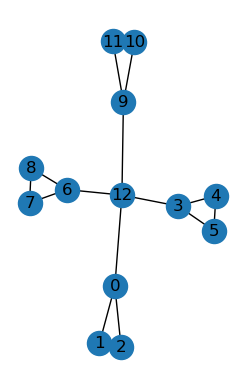

In [2]:

'''

Here we first define some parameters:

'''
N_Triangle = 4
TriNodes = [[3 * i , 3 * i + 1, 3 * i + 2] for i in range(N_Triangle)]
center = N_Triangle * 3 
A = np.eye(center + 1 ) * 0
D = np.eye(center + 1) * 2
x = []
edges = []
for trin in TriNodes:
    edges.append([trin[0], trin[1]])
    edges.append([trin[1], trin[2]])
    edges.append([trin[0], trin[2]])
    edges.append([trin[0], center ])
    D[trin[0]][trin[0]] = 3
    x.append(0)
    x.append(1)
    x.append(1)
x.append(0)
mask = [str(ele) for ele in x]



for edge in edges:
    n1, n2 = edge[0], edge[1]
    A[n1][n2] = 1
    A[n2][n1] = 1
G = nx.from_numpy_matrix(A)
subax1 = plt.subplot(121)
nx.draw(G,  with_labels=True)   # default spring_layout
print(D[:5][:5])


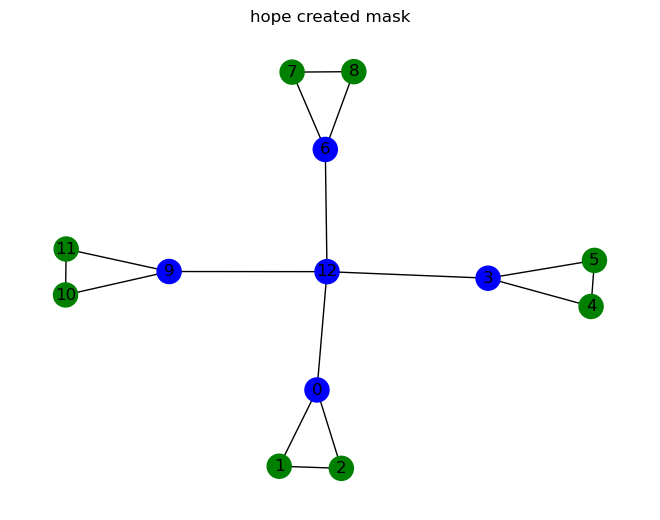

In [3]:


color_map = []
for i, node in enumerate(G):
    if x[i]  == 1:
        color_map.append('green')
    else: 
        color_map.append('blue')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.title('hope created mask')
plt.show()



In [4]:

L = D - A
lambdas , U = np.linalg.eig(L)
print(L)
idx = lambdas.argsort()[::-1]   
lambdas = lambdas[idx]
U = U[:,idx]
print(lambdas)
print(U)


[[ 3. -1. -1.  0. ...  0.  0.  0. -1.]
 [-1.  2. -1.  0. ...  0.  0.  0.  0.]
 [-1. -1.  2.  0. ...  0.  0.  0.  0.]
 [ 0.  0.  0.  3. ...  0.  0.  0. -1.]
 ...
 [ 0.  0.  0.  0. ...  3. -1. -1. -1.]
 [ 0.  0.  0.  0. ... -1.  2. -1.  0.]
 [ 0.  0.  0.  0. ... -1. -1.  2.  0.]
 [-1.  0.  0. -1. ... -1.  0.  0.  2.]]
[ 4.895  3.732  3.732  3.732 ...  0.268  0.268  0.268 -0.292]
[[-0.394  0.016  0.001  0.769 ...  0.398  0.092  0.018 -0.291]
 [ 0.101 -0.006 -0.    -0.282 ...  0.544  0.125  0.025 -0.225]
 [ 0.101 -0.006 -0.    -0.282 ...  0.544  0.125  0.025 -0.225]
 [-0.394 -0.73  -0.103 -0.256 ... -0.133 -0.348 -0.102 -0.291]
 ...
 [-0.394  0.357  0.673 -0.256 ... -0.133 -0.028  0.356 -0.291]
 [ 0.101 -0.131 -0.246  0.094 ... -0.181 -0.038  0.486 -0.225]
 [ 0.101 -0.131 -0.246  0.094 ... -0.181 -0.038  0.486 -0.225]
 [ 0.545 -0.    -0.     0.    ... -0.     0.     0.    -0.507]]


[ True False False False ... False False False  True]
the 0 eigenvector * 0.8095711146322355
the 8 eigenvector * -2.0265307897833216
the 12 eigenvector * -1.7993797732589165
[-8.881784197001252e-16, 1.0000000000000018, 1.0000000000000022, 4.440892098500626e-16, 0.9999999999999998, 1.0000000000000002, 3.3306690738754696e-16, 0.9999999999999998, 0.9999999999999998, 3.3306690738754696e-16, 0.9999999999999998, 0.9999999999999998, -7.771561172376096e-16]


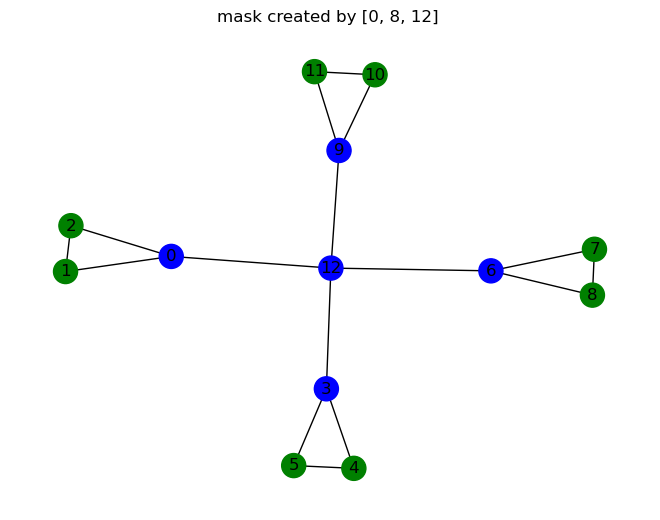

In [5]:
x = np.array(x).reshape(center + 1, 1)
output = U.T @ x
print(np.abs(output.reshape(-1)) > 0.0001)
# print(  output.reshape(-1).tolist())
output = output.reshape(-1).tolist()
created_mask = 0
used_vectors = []
for i in range(len(output)):
    if np.abs(output[i]) > 0.0000001:
        print(f'the {i} eigenvector * {output[i]}')
        created_mask = created_mask + output[i] * U[:, i]
        used_vectors.append(i)
created_mask = created_mask.tolist()

print(created_mask)
color_map = []
for i, node in enumerate(G):
    if created_mask[i]  > 0.9:
        color_map.append('green')
    else: 
        color_map.append('blue')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.title(f'mask created by {used_vectors} ')
plt.show()


In [6]:

label_values = [gg[0] for gg in x]

draw_color(label_values, G, n_node = center)


In [8]:
for i in range(center + 1):
     eiventor = U[:, i].tolist()
     label_values = [gg for gg in eiventor]

     draw_color(label_values, G, n_node = center, title= f'the {i}-th eigen vector')
